<a href="https://colab.research.google.com/github/sraeisi/Machine_Learning_Physics_Winter20/blob/master/Lec1/Reg%26Clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lecture 3-4: Regression and Classification
===

## Preliminaries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 3 )
plt.rc('lines', linewidth = 3 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

In [8]:
def grid(x1, x2, off_set = .1, n_points = 100):
    ## d s show the range in the two varible. 
    d1 = x1.max() - x1.min()
    d2 = x2.max() - x2.min()
    
    x1_min, x1_max = x1.min() - off_set * d1 , x1.max() + off_set * d1
    x2_min, x2_max = x2.min() - off_set * d2 , x2.max() + off_set * d2

    ## This function from numpy gives a list of coordinates that are the points on the grid. 
    x, y = np.meshgrid(np.arange(x1_min, x1_max , d1/n_points), np.arange(x2_min, x2_max , d2/n_points) )

    return x , y 

## Regression

## Polynomial Regression

In [0]:
x_rg = np.array([1,2,3]).reshape(-1,1)

y_rg = np.array([1,1.5,3]).reshape(-1,1)

## Find [w,b] such that X.w = Y

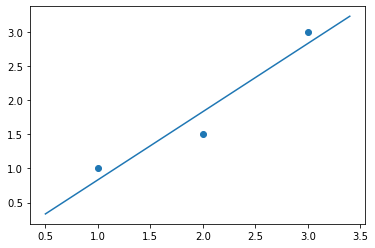

In [0]:
## We add a column to x for the x^0 which is to determine the intercept. 
x_rg = np.hstack([x_rg, x_rg**0])

## Construct m as X^T.X
m = np.dot(x_rg.T,x_rg)

## It is inversible. 
np.dot(np.linalg.inv(m),m)

w = np.dot(np.linalg.inv(m),np.dot(x_rg.T, y_rg))

x_range = np.arange(0.5,3.5,.1)
# x_rg_list = np.vstack(np.arange(0.5,3.5,.1), np.ones(len(x_range)))
y_rg_list = w[0]*x_range + w[1]

plt.scatter(x_rg[:,0], y_rg)
plt.plot(x_range, y_rg_list)


In [5]:
def poly_features(x, deg):
    return np.hstack([x**(deg-d) for d in np.arange(deg+1) ])

poly_features(x_rg, 2)

array([[1, 1, 1],
       [4, 2, 1],
       [9, 3, 1]])

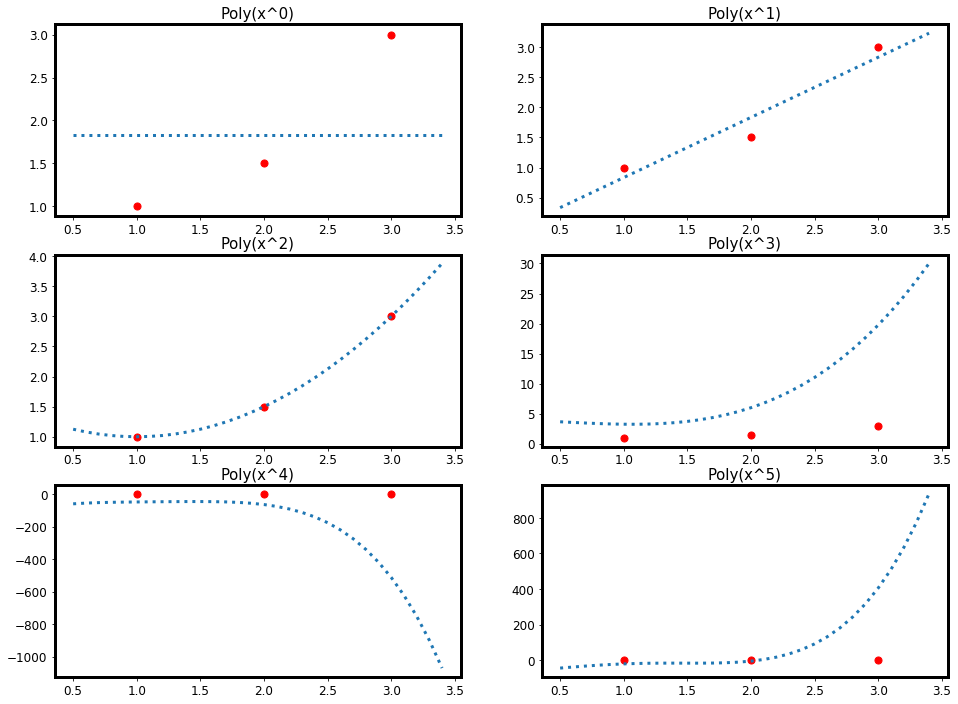

In [0]:
'''
Now let's try higher orders. 
How high can ve go. 
'''
x_rg = np.array([1,2,3]).reshape(-1,1)
y_rg = np.array([1,1.5,3]).reshape(-1,1)

# x_rg = np.hstack([x_rg, x_rg**0])

# for the plot
x_range = np.arange(0.5,3.5,.1).reshape(-1,1)
fig = plt.figure(figsize=(16,12))

for deg in range(6):

    ## Make the X matrix with powers of the x
    x_rg_in = poly_features(x_rg, deg)

    ## Construct m as X^T.X
    m = np.dot(x_rg_in.T,x_rg_in)

    ## This gives the w
    w = np.dot(np.linalg.inv(m),np.dot(x_rg_in.T, y_rg))
#     print(w)
    

    ## Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)
    
    ax = fig.add_subplot(3, 2, deg+1 ,  title = f'Poly(x^{deg})')
    ax.scatter(x_rg, y_rg, s = 50, c = 'r')
    ax.plot(x_range, y_rg_list, ls='dotted')

    

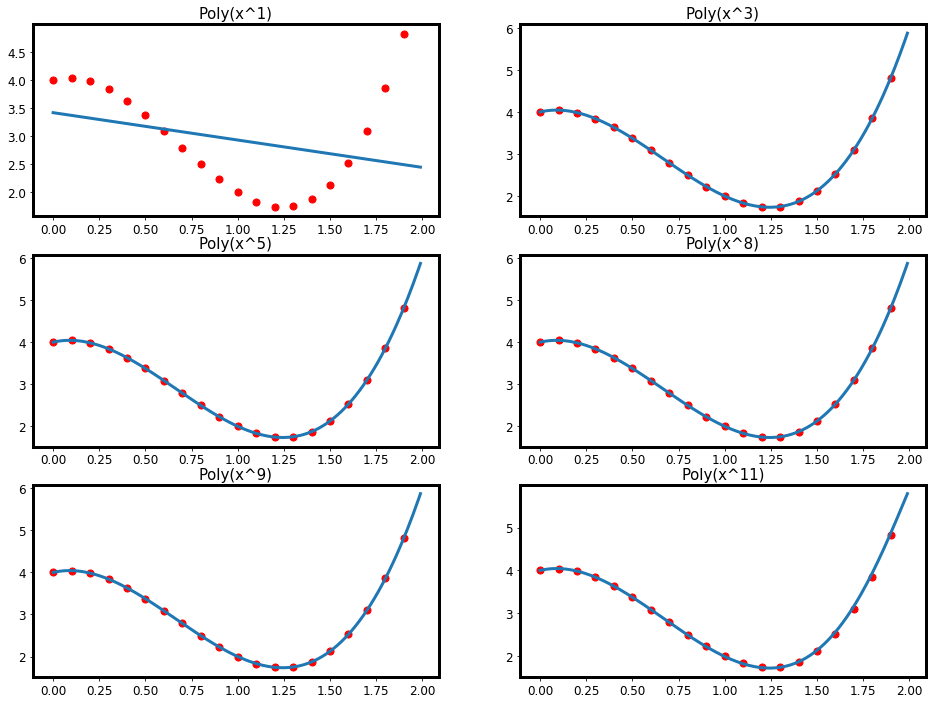

In [6]:
'''
Now let's try higher orders. 
How high can ve go. 
'''
w_real = np.array([3,-6,1,4])

x_rg = np.arange(0,2,.1).reshape(-1,1)
y_rg = np.dot(poly_features(x_rg, len(w_real)-1 ), w_real).reshape(-1,1)


# x_rg = np.hstack([x_rg, x_rg**0])

# for the plot
x_range = np.arange(0,2,.01).reshape(-1,1)
fig = plt.figure(figsize=(16,12))

deg_list = [1,3,5,8, 9, 11]
ind = 0
for deg in deg_list:
    ind +=1
    ## Make the X matrix with powers of the x
    x_rg_in = poly_features(x_rg, deg)

    ## Construct m as X^T.X
    m = np.dot(x_rg_in.T,x_rg_in)

    ## This gives the w
    w = np.dot(np.linalg.inv(m),np.dot(x_rg_in.T, y_rg))
#     print(deg, w.reshape(-1))
    

    ## Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)
    
    ax = fig.add_subplot(3, 2, ind ,  title = f'Poly(x^{deg})')
    ax.scatter(x_rg, y_rg, s = 50, c = 'r')
    ax.plot(x_range, y_rg_list)

    

In [8]:
print(w)
print(w_real)

[[-1.55639648e-03]
 [-5.61523438e-03]
 [ 3.51562500e-02]
 [-4.68750000e-02]
 [ 3.12500000e-02]
 [-1.56250000e-02]
 [-7.81250000e-03]
 [ 5.85937500e-03]
 [ 2.99804688e+00]
 [-5.99963379e+00]
 [ 9.99977112e-01]
 [ 4.00000001e+00]]
[ 3 -6  1  4]


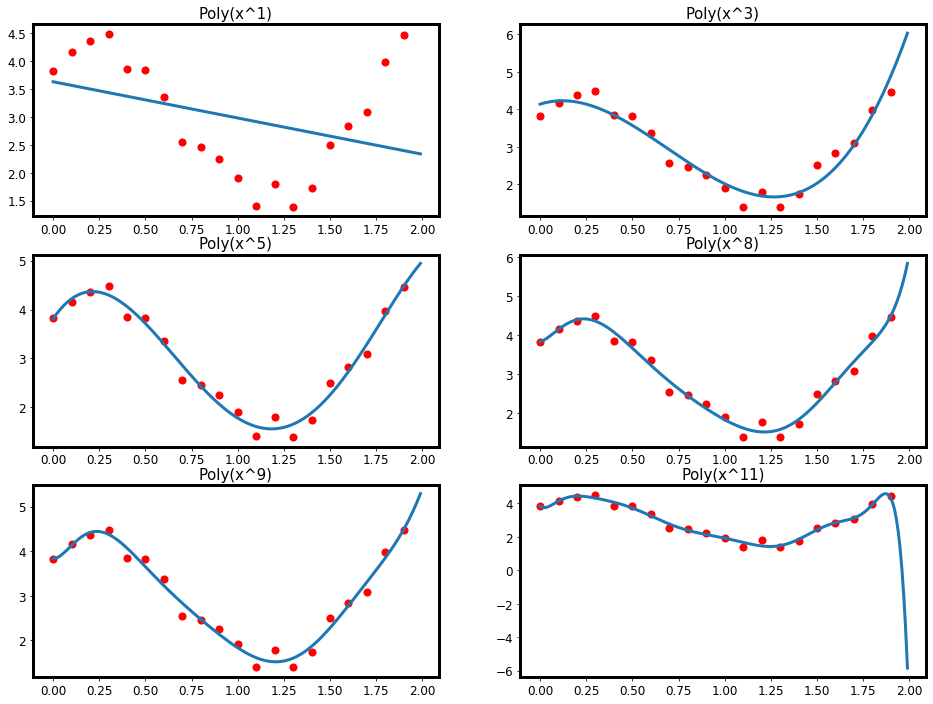

In [9]:
'''
Now let's try higher orders. 
How high can ve go. 
'''
w_real = np.array([3,-6,1,4])

x_rg = np.arange(0,2,.1).reshape(-1,1)
y_rg = np.dot(poly_features(x_rg, len(w_real)-1 ), w_real).reshape(-1,1)
# Let's add some noise:
y_rg = y_rg + np.random.normal(0, .3, len(y_rg)).reshape(-1,1)

# x_rg = np.hstack([x_rg, x_rg**0])

# for the plot
x_range = np.arange(0,2,.01).reshape(-1,1)
fig = plt.figure(figsize=(16,12))


deg_list = [1,3,5,8, 9, 11]
ind = 0
for deg in deg_list:
    ind +=1
    ## Make the X matrix with powers of the x
    x_rg_in = poly_features(x_rg, deg)

    ## Construct m as X^T.X
    m = np.dot(x_rg_in.T,x_rg_in)

    ## This gives the w
    w = np.dot(np.linalg.inv(m),np.dot(x_rg_in.T, y_rg))
#     print(deg, w.reshape(-1))
    

    ## Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)
    
    ax = fig.add_subplot(3, 2, ind ,  title = f'Poly(x^{deg})')
    ax.scatter(x_rg, y_rg, s = 50, c = 'r')
    ax.plot(x_range, y_rg_list)

    

In [10]:
w

array([[-2.00493652e+02],
       [ 2.02593555e+03],
       [-8.82697852e+03],
       [ 2.17191758e+04],
       [-3.32149297e+04],
       [ 3.27581562e+04],
       [-2.09396797e+04],
       [ 8.49482422e+03],
       [-2.06485596e+03],
       [ 2.55471558e+02],
       [-8.53556824e+00],
       [ 3.83354340e+00]])

## Examples

### Regression for the Black Body Radiation

In [11]:
## This data is collected from galileo.phys.virginia.edu/classes/252
# bbr_data_url = "http://galileo.phys.virginia.edu/classes/252/bbr.xls"
bbr_data_url = "https://github.com/sraeisi/MachineLearning_Physics/blob/master/Lec_1/bbr.xls?raw=true"

bbr_data = pd.read_excel(bbr_data_url)

# bbr_data = pd.read_excel('bbr.xls')

bbr_data.head()

,0,T,0.1,T/2,0.2
0,88182000000,2.978514e-23,2.997673e-23,1.478758e-23,1.498837e-23
1,176364000000,1.183007e-22,1.199069e-22,5.831636e-23,5.995346e-23
2,264546000000,2.642956e-22,2.697906e-22,1.293533e-22,1.348953e-22
3,352728000000,4.665309e-22,4.796277e-22,2.266891e-22,2.398138e-22
4,440910000000,7.237795e-22,7.494183e-22,3.491384e-22,3.747091e-22


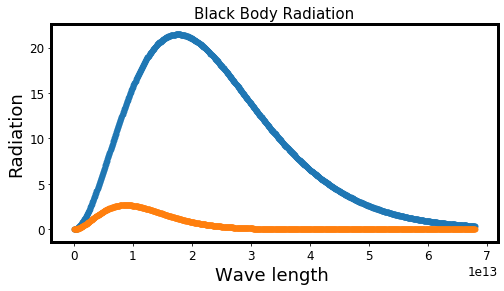

In [12]:
n_s_rate=1

x_label = 'Wave length '
y_label = 'Radiation'
plt_title = 'Black Body Radiation'
fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.scatter(bbr_data[0][::n_s_rate], 10**20*bbr_data['T'][::n_s_rate])
ax.scatter(bbr_data[0][::n_s_rate], 10**20*bbr_data['T/2'][::n_s_rate])
plt.show()

In [0]:
'''
Exercise:
Find a fit and plot them along side the data. 

- Define X,Y
- Use SVR to find a fit
- Plot it with the data
'''
X = bbr_data[0].values.reshape(len(bbr_data),1)
Y = 10**18*bbr_data['T'].values#.reshape(len(bbr_data),1)


In [15]:
X

array([[   88182000000],
       [ 4497282000000],
       [ 8906382000000],
       [13315482000000],
       [17724582000000],
       [22133682000000],
       [26542782000000],
       [30951882000000],
       [35360982000000],
       [39770082000000],
       [44179182000000],
       [48588282000000],
       [52997382000000],
       [57406482000000],
       [61815582000000],
       [66224682000000]])

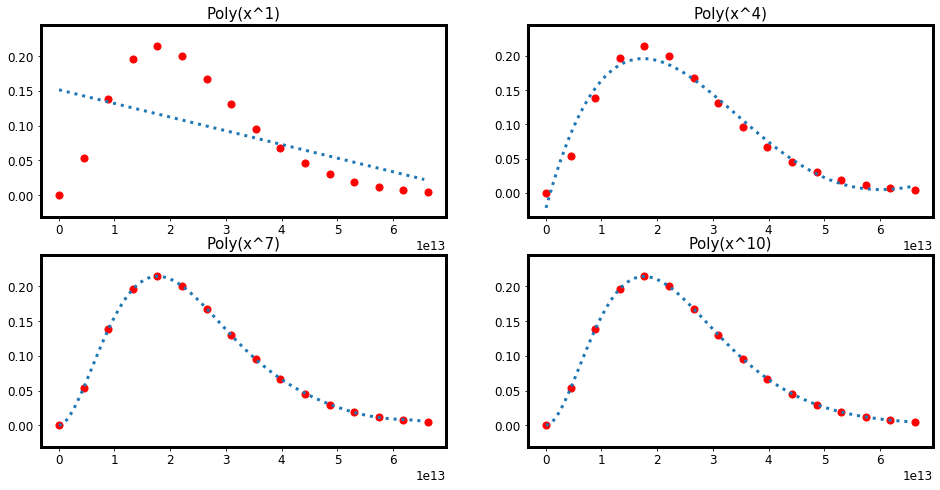

In [18]:
X = bbr_data[0].values.reshape(len(bbr_data),1)
Y = 10**18*bbr_data['T'].values#.reshape(len(bbr_data),1)

X = X - X.mean()/X.var()

n_points = 100
n_rate = 50
X = X[::n_rate]
Y = Y[::n_rate]

deg = 5

# for the plot
x_range = np.arange(X.min(),X.max(),(X.max() - X.min())/n_points ).reshape(-1,1)

fig = plt.figure(figsize=(16,12))

ind = 0
max_deg = 11
deg_rate = 3
for deg in np.arange(1,max_deg, deg_rate, dtype='int'):
    ind += 1

    ## Make the X matrix with powers of the x
    x_rg_in = poly_features(X, deg)

    ## Construct m as X^T.X
    m = np.dot(x_rg_in.T,x_rg_in)

    ## This give the w
    w = np.dot(np.linalg.inv(m),np.dot(x_rg_in.T, Y))
#     print(w)
    # x_rg_list = np.vstack(np.arange(0.5,3.5,.1), np.ones(len(x_range)))
    

    ## Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)
    
    ax = fig.add_subplot(3, 2, ind ,  title = f'Poly(x^{deg})')
    ax.scatter(X, Y, s = 50, c = 'r')
    ax.plot(x_range, y_rg_list, ls='dotted')

    

In [20]:
%%time
from sklearn.svm import SVR
bbr_reg = SVR(kernel='poly')
bbr_reg.fit(X,Y)
print(bbr_reg.score(X,Y) )

-0.06436505377841062
CPU times: user 3.08 ms, sys: 0 ns, total: 3.08 ms
Wall time: 4.64 ms


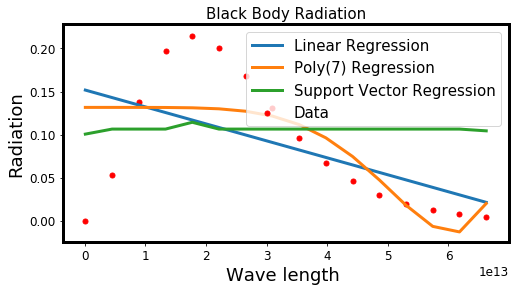

CPU times: user 254 ms, sys: 104 ms, total: 358 ms
Wall time: 244 ms


In [22]:
%%time

from sklearn.linear_model import LinearRegression
## The linear model
bbr_reg_lin = LinearRegression()
bbr_reg_lin.fit( X , Y )


## The polynomial model
pl_deg=7
from sklearn.preprocessing import PolynomialFeatures
polytransform = PolynomialFeatures(degree=pl_deg )
bbr_reg_poly = LinearRegression()
bbr_reg_poly.fit(       polytransform.fit_transform( X )      , Y )


## The SVM model with kernel
## You can see that this is not good
from sklearn.svm import SVR
bbr_reg_svr = SVR(kernel='rbf', gamma=10)
bbr_reg_svr.fit(X,Y)


fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(X, bbr_reg_lin.predict( X ) ,label='Linear Regression' )
ax.plot(X, bbr_reg_poly.predict( polytransform.fit_transform(X) ) ,label=f'Poly({pl_deg}) Regression' )
ax.plot(X, bbr_reg_svr.predict( X ) ,label='Support Vector Regression' )
ax.scatter(X ,Y, color='r',label='Data' )
ax.legend(loc=1)
plt.show()

### Ground state energy of complexy molecules
Here we investigate the ground state enery of moecules. This is in general a challenging problem. Here we use the data from some simulations for different molecules. 
=> Coulomb matrix



In [0]:
import io, requests, zipfile

In [0]:
'''
We need to first import the data. I took the data from kaggle datasets. 
This is ground state energy of some molecules based on their different 
chemical bounds. 
'''

url = 'https://www.dropbox.com/s/das9t6vwp7t4b7f/roboBohr.csv.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' , index_col=0)
 
'''
Alternatively, you can download the file into your computer and run the following code. 
You need to uncomment it first. 
'''    
# data = pd.read_csv('roboBohr.csv.zip', compression='zip', index_col=0)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,12.342823,12.335925,12.328055,12.284265,12.269844,12.247357,10.557967,10.473721,9.225262,8.448526,7.611145,7.610874,7.580510,7.579386,7.576929,7.536001,7.517317,7.462578,7.459865,7.456214,7.447581,7.443458,7.423496,7.345785,7.323741,7.247088,7.230886,6.662523,6.286251,6.134338,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,15.202985,14.800045,12.855629,12.728858,12.618058,12.589962,12.557323,12.074893,10.607138,10.572061,10.464293,9.816674,9.456914,9.455816,8.865704,8.104048,8.006855,7.968817,7.946644,7.932943,7.922656,7.888724,7.885692,7.783220,7.637477,7.636586,7.631457,7.336591,7.127698,6.974135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,7.607776,7.550253,7.446675,7.398848,7.381532,7.355045,7.321944,6.625986,6.116315,6.106397,6.098066,5.989868,5.731750,5.700963,5.371527,5.008911,4.894453,4.826545,4.352232,4.270598,2.902330,2.902220,2.901834,2.901089,2.900168,2.900151,2.899983,2.898772,2.898551,2.897620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,12.420665,12.410312,12.346845,12.175480,12.098758,10.612802,10.610273,10.606738,10.606702,10.433290,8.694957,8.421582,8.103569,8.103345,7.595619,7.566897,7.555411,7.413109,7.403199,7.185256,6.915425,6.198245,6.191266,6.181797,6.152544,5.252689,5.244354,5.176740,5.176314,5.175577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,10.485270,8.595823,8.103880,8.103567,7.975189,7.546413,7.503300,6.803380,6.738768,5.169492,5.161869,5.145972,4.924911,4.899245,4.534996,4.486310,3.897466,3.081523,2.957823,2.903069,2.902178,2.900610,2.900542,2.900306,2.899368,2.899113,2.897739,2.896793,2.896063,2.895051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


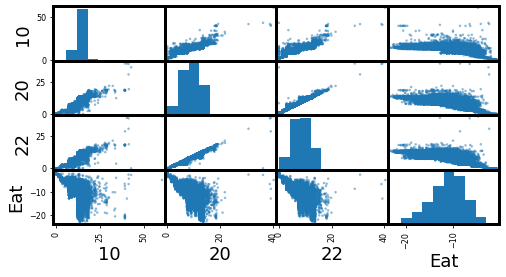

In [0]:
pd.plotting.scatter_matrix(data[['10','20','22', 'Eat']])
plt.show()

In [0]:
print(data.columns[-4:])
data.drop('pubchem_id',axis=1, inplace=True)
data.columns[-4:]

Index(['1273', '1274', 'pubchem_id', 'Eat'], dtype='object')


Index(['1272', '1273', '1274', 'Eat'], dtype='object')

***Make a model that can predict the values of the ground state energy, 'Eat'!***

Try to plot these different models. 


In [0]:
Y = data['Eat'].values
X = data.drop('Eat',axis=1).values

## Classification

### The concept

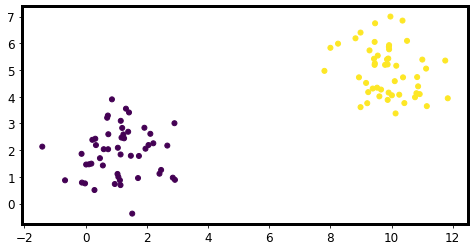

In [26]:
'''
Just as we did for clustering, we generate a set points in 2D but 
this time we are going to use the labels, Y for training a classifer. 
'''
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=100,centers=[[1,2], [10,5]])

plt.scatter(*X.T, c=Y)

What does a CLF do and how does it work? 

We are looking for f(X) such that for class 1, f(X) > 0 and for class 2, f(X) < 0. 

Let's try some models


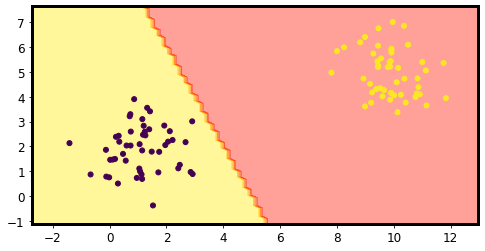

In [36]:
def test_model(w_list, bias = 0):
    '''
    This model returns a function f = w.X. 
    Note that the assumption is 
    X is [n_s, n_f = 2]
    w is [n_f] (is a vector). 
    '''
    def f(x):
        return np.dot(x,w_list) + bias
    return f

w_random = np.random.uniform(-1,1,2)
clf = test_model(w_random)

clf = test_model([2, 1],bias = -10)

x1_list, x2_list = grid(X[:,0], X[:,1], n_points=70)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T


Y_grid = clf( X_grid ).reshape(x1_list.shape ) > 0

fig = plt.figure()
ax = fig.add_subplot(111)

ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.autumn_r)
ax.scatter(*X.T, c=Y)
plt.show()


In [37]:
from matplotlib.widgets import Slider, Button, RadioButtons
from ipywidgets import interact, IntSlider



def test_model_plot(a, b):
    w_list = [1,a]
    clf = test_model(w_list, b  )
    Y_grid = clf( X_grid ).reshape(x1_list.shape ) > 0

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(*X.T, c=Y)
    ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.autumn)
    plt.show()

    return None

interact(test_model_plot, a=IntSlider(min=-5, max=5, step=1, value=2), b=IntSlider(min=-10, max=10, step=1, value=2))

interactive(children=(IntSlider(value=2, description='a', max=5, min=-5), IntSlider(value=2, description='b', …

<function __main__.test_model_plot>

**Question: Find a way to optimize this!**

Write a function that given the X and Y, finds a linear classification for this problem. 

### Classifiers from sklearn

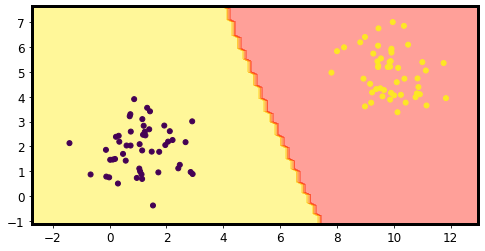

In [48]:

'''
We can use sklearn to implement some of the well-known classification algorithms. 
'''

from sklearn.linear_model import SGDClassifier
from sklearn.svm import  SVC

clf = SGDClassifier()
clf = SVC()
clf.fit(X, Y)

x1_list, x2_list = grid(X[:,0], X[:,1], n_points=70)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T

Y_grid = clf.predict( X_grid ).reshape(x1_list.shape )

fig = plt.figure()
ax = fig.add_subplot(111)

ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.autumn_r)
ax.scatter(*X.T, c=Y)
plt.show()

### Different Algorithms of Classification

In [124]:

import io, requests, zipfile  ## Need these to import the data from the link I created on dropbox. 

url = 'https://raw.githubusercontent.com/sraeisi/Machine_Learning_Physics_Winter20/master/Lec1/particle_mini.npz'
s=requests.get(url, stream=True).content
data=np.load(io.BytesIO(s) )


## If want to run locally
# data= np.load('particle_mini.npz')

X, Y = data['X'], data['Y']

from sklearn.preprocessing import scale
X = scale(X)


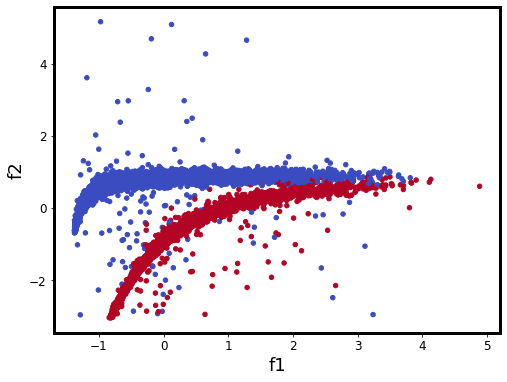

In [39]:

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, xlabel = 'f1', ylabel='f2')
ax.scatter(X[:,0], X[:,1], c= Y , cmap=plt.cm.coolwarm, s=20)

plt.show()

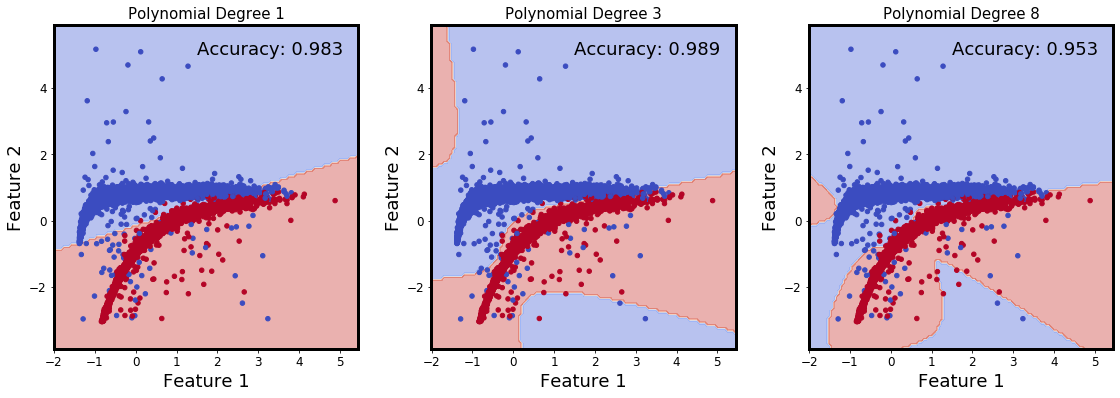

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDClassifier


transformer_dict = {'Polynomial Degree 1' : PolynomialFeatures(degree=1).fit(X),
           'Polynomial Degree 3' : PolynomialFeatures(degree=3).fit(X),
           'Polynomial Degree 8' : PolynomialFeatures(degree=8).fit(X)}


x1_list, x2_list = grid(X[:,0], X[:,1], n_points=100)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T


x_label = 'Feature 1'
y_label = 'Feature 2'

fig = plt.figure(figsize=(16,16))
for clf in list(transformer_dict.keys())[:]:
    ax = fig.add_subplot(3, 3, list(transformer_dict.keys()).index(clf)+1 , xlabel = x_label, ylabel=y_label, title = clf)
    
    transformer = transformer_dict[clf]
    
    clf = SGDClassifier( random_state=0, n_jobs=-1 ).fit( transformer.transform(X) , Y )

    Y_grid = clf.predict( transformer.transform( X_grid )).reshape(x1_list.shape )
    
    ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
    ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)    
    ax.text(1.5, 5, f'Accuracy: {np.round( clf.score(transformer.transform(X) , Y),3)}')
    

plt.tight_layout()

plt.show()

In [62]:
%%time

'''
In order to plot the classifiers, we need to restrict them to two D. 
So I am going to train them on only the two features that I plot. 
'''

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier


clf_dict = {'SVC with linear kernel':SVC(kernel='linear').fit(X,Y)
            , 'SVC with poly(d=3) kernel':SVC(kernel='poly', degree=3).fit(X,Y)
            , 'SVC with rbf kernel':SVC(kernel='rbf').fit(X,Y)
            , 'KNN with k=3': KNeighborsClassifier(n_neighbors=3).fit(X,Y)
            , 'KNN with k=10': KNeighborsClassifier(n_neighbors=10).fit(X,Y)
            , 'KNN with k=30': KNeighborsClassifier(n_neighbors=30).fit(X,Y)
            , 'SGD':SGDClassifier(loss='log').fit(X,Y) 
            , 'Decision Tree' : DecisionTreeClassifier().fit(X,Y)
            , 'Naive Bayes' : GaussianNB().fit(X,Y)  }



Wall time: 3.52 s


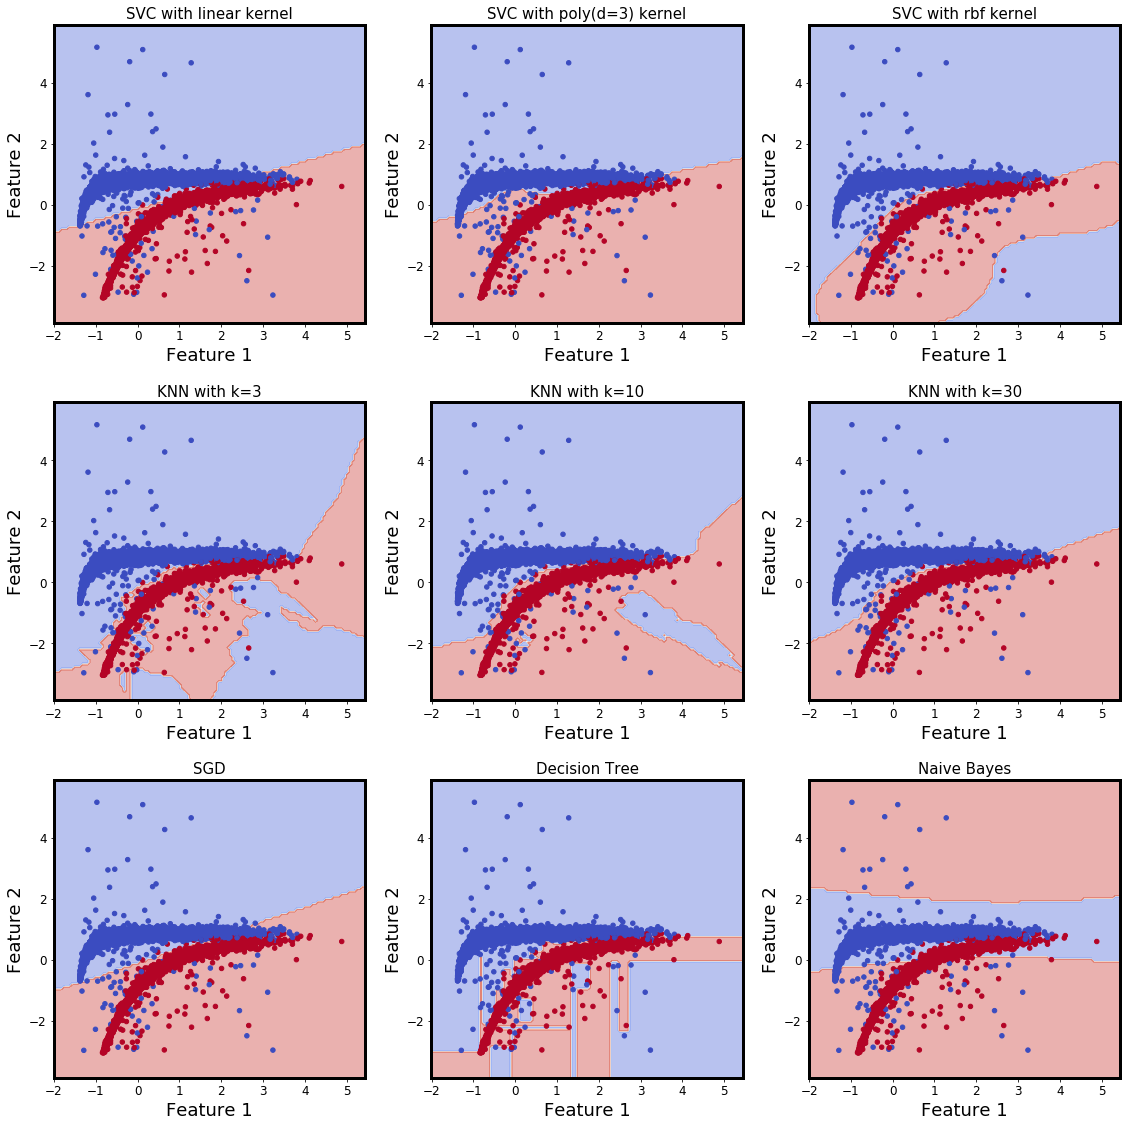

In [63]:
x1_list, x2_list = grid(X[:,0], X[:,1], n_points=100)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T


x_label = 'Feature 1'
y_label = 'Feature 2'
fig = plt.figure(figsize=(16,16))
for clf in list(clf_dict.keys())[:]:
    ax = fig.add_subplot(3, 3, list(clf_dict.keys()).index(clf)+1 , xlabel = x_label, ylabel=y_label, title = clf)
    clf = clf_dict[clf]

    Y_grid = clf.predict( X_grid ).reshape(x1_list.shape )
    
    ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
    ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)    
    

plt.tight_layout()
plt.show()

### Decision Tree

In [21]:
clf_dict = {'Decision Tree with Max Depth 2' : DecisionTreeClassifier(max_depth=2).fit(X,Y),
           'Decision Tree with Max Depth 5' : DecisionTreeClassifier(max_depth=5).fit(X,Y),
           'Decision Tree with Max Depth 10' : DecisionTreeClassifier(max_depth=10).fit(X,Y)}

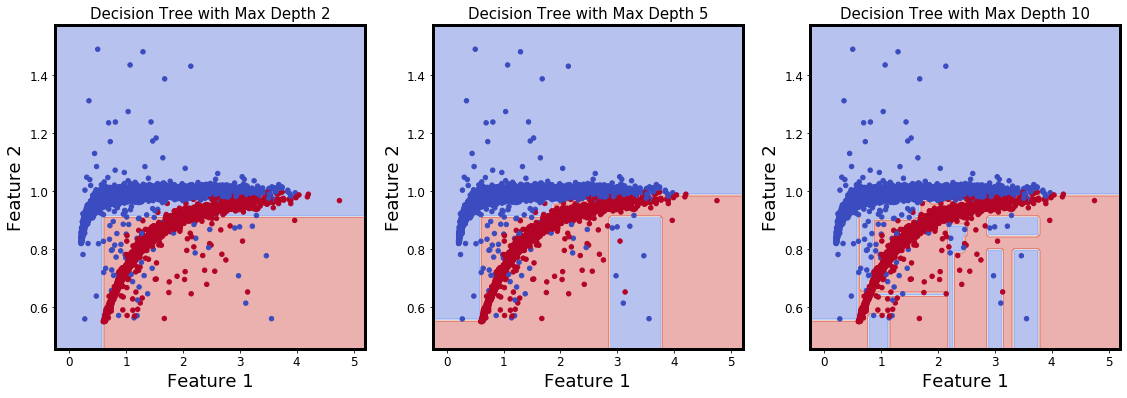

In [22]:
fig = plt.figure(figsize=(16,16))
for clf in list(clf_dict.keys())[:]:
    ax = fig.add_subplot(3, 3, list(clf_dict.keys()).index(clf)+1 , xlabel = x_label, ylabel=y_label, title = clf)
    clf = clf_dict[clf]

    X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
    Y_grid = clf.predict( X_grid ).reshape(x1_list.shape )
    
    ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
    ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)    
    

plt.tight_layout()
plt.show()

### KNN

In [23]:
clf_dict = {'KNN with k=3': KNeighborsClassifier(n_neighbors=3).fit(X,Y) , 
            'KNN with k=10': KNeighborsClassifier(n_neighbors=10).fit(X,Y), 
            'KNN with k=30': KNeighborsClassifier(n_neighbors=30).fit(X,Y)}

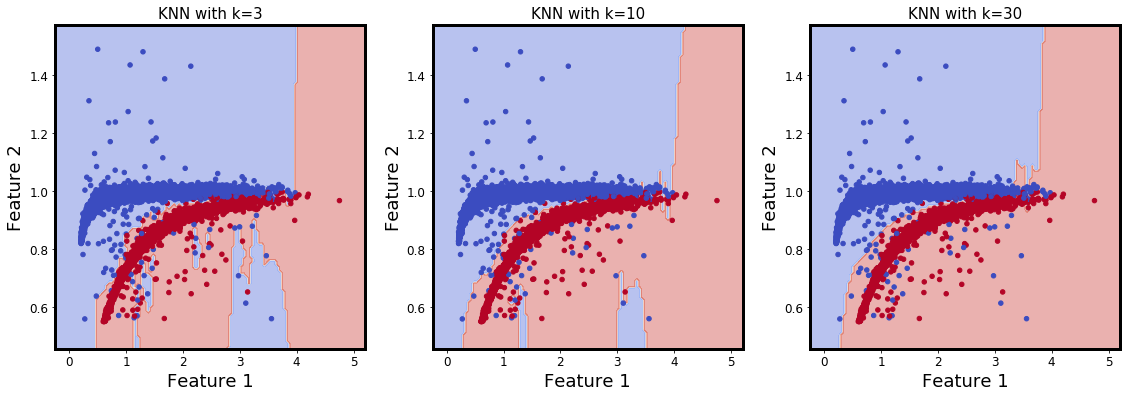

In [24]:
fig = plt.figure(figsize=(16,16))
for clf in list(clf_dict.keys())[:]:
    ax = fig.add_subplot(3, 3, list(clf_dict.keys()).index(clf)+1 , xlabel = x_label, ylabel=y_label, title = clf)
    clf = clf_dict[clf]

    X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
    Y_grid = clf.predict( X_grid ).reshape(x1_list.shape )
    
    ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
    ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)    
    

plt.tight_layout()
plt.show()

### Naive-Bayes

In [68]:
clf_dict = {'Naive Bayes with smoothing = e-4' : GaussianNB( var_smoothing=.0001 ).fit(X,Y) ,
           'Naive Bayes with smoothing = e-3' : GaussianNB( var_smoothing=.001 ).fit(X,Y) ,
           'Naive Bayes with smoothing = e-2' : GaussianNB( var_smoothing=.01 ).fit(X,Y) }

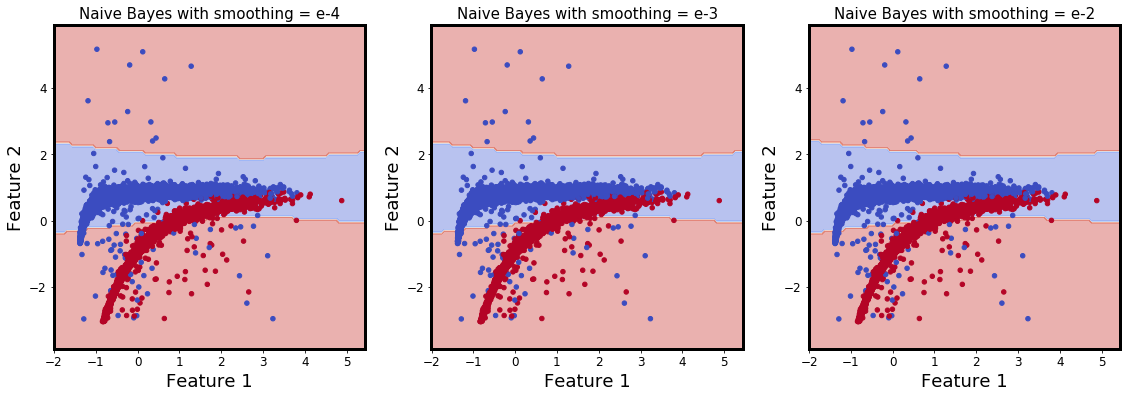

In [69]:
fig = plt.figure(figsize=(16,16))
for clf in list(clf_dict.keys())[:]:
    ax = fig.add_subplot(3, 3, list(clf_dict.keys()).index(clf)+1 , xlabel = x_label, ylabel=y_label, title = clf)
    clf = clf_dict[clf]

    X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
    Y_grid = clf.predict( X_grid ).reshape(x1_list.shape )
    
    ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
    ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)    
    

plt.tight_layout()
plt.show()

# Generalization

One of the main expectations we have for a predictive model, is to be able to **predict** and predict not only the values it has seen, but also the ones that are reasonably in the range and yet not specifically in the set of the data.

Let's see this from a different viewpoint. If we only care about getting every single sample right, why not memorize all the data and their labels. 

**Question:** Can you make classifier with any of the algorithms above that does exactly this, i.e. memorize all the instances. 

### A stupid classifier that memorizes the data

In [113]:
def memorize(X,Y, base_class=True):
    def f(x):
        if x in X:
            c = Y[X.tolist().index(list(x) ) ]
        else:
            if base_class:
                print('Cannot determine the class of this data.')
                c = None
            else:
                c = base_class
        return c
    return f

    
    

In [114]:
clf_mm = memorize(X,Y)

In [117]:
# For the data inside the sample: 
ind = np.random.randint(0, len(Y))
print(ind)
print(f'The true label is {Y[ind]}')
print(f'The predicted label is {clf_mm(X[ind])}')

30
The true label is 2
The predicted label is 2


In [118]:
# For new data:
test_x = .98*X[0]

print(f'The new sample is in the data: {test_x in X}')
print(f'The predicted label is {clf_mm(test_x)}')

The new sample is in the data False
Cannot determine the class of this data.
The predicted label is None


## In vs out-sample performance